In [5]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\USUARIO\anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ------------------------------------------------------------
                                           Total:          10 KB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0




missingno-0.4.1      | 10 KB     |            |   0% 
missingno-0.4.1      | 10 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


Para importar del repositorio pandas numpy 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [8]:
# Microdatos de Windows Store https://www.kaggle.com/vishnuvarthanrao/windows-store
path = 'datasets_msft.csv'
df_msft = pd.read_csv(path)
df_msft.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [9]:
df_msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5322 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   object 
 5   Price               5321 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 249.6+ KB


In [10]:
df_msft.shape

(5322, 6)

In [19]:
#Número de filas
df_msft.shape[0]

5322

In [18]:
#Número de columnas
df_msft.shape[1] 

6

In [20]:
#Nombre de las columnas
df_msft.columns.values.tolist()

['Name', 'Rating', 'No of people Rated', 'Category', 'Date', 'Price']

In [22]:
#Tipo de datos 
df_msft.dtypes

Name                   object
Rating                float64
No of people Rated      int64
Category               object
Date                   object
Price                  object
dtype: object

 ¿Hay datos faltantes?

In [24]:
df_msft.isnull().any().any()

True

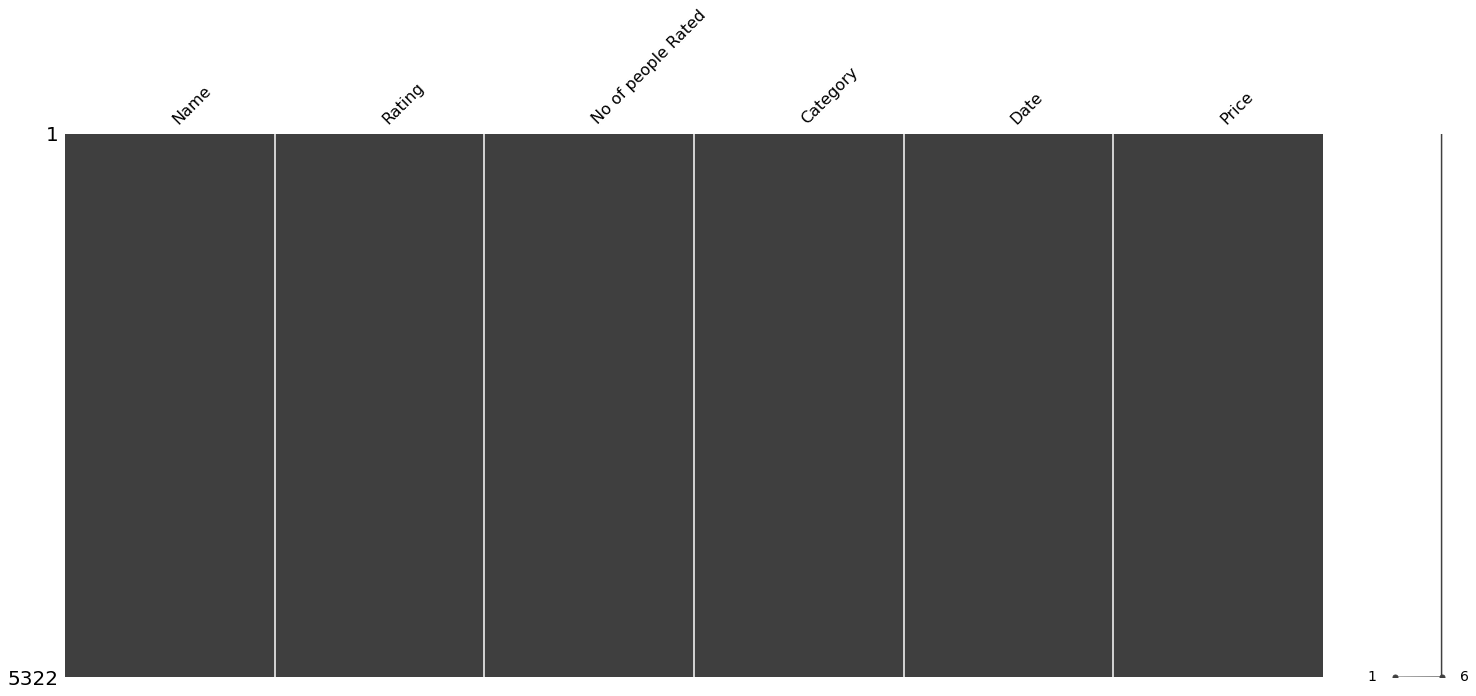

In [27]:
msno.matrix(df_msft)

In [28]:
df_msft.replace({' ': np.nan}, inplace=True) #creo que no fue necesario, solo tengo un un valor vacio por variable.

In [29]:
df_msft.isnull().any().any() # ni esto

True

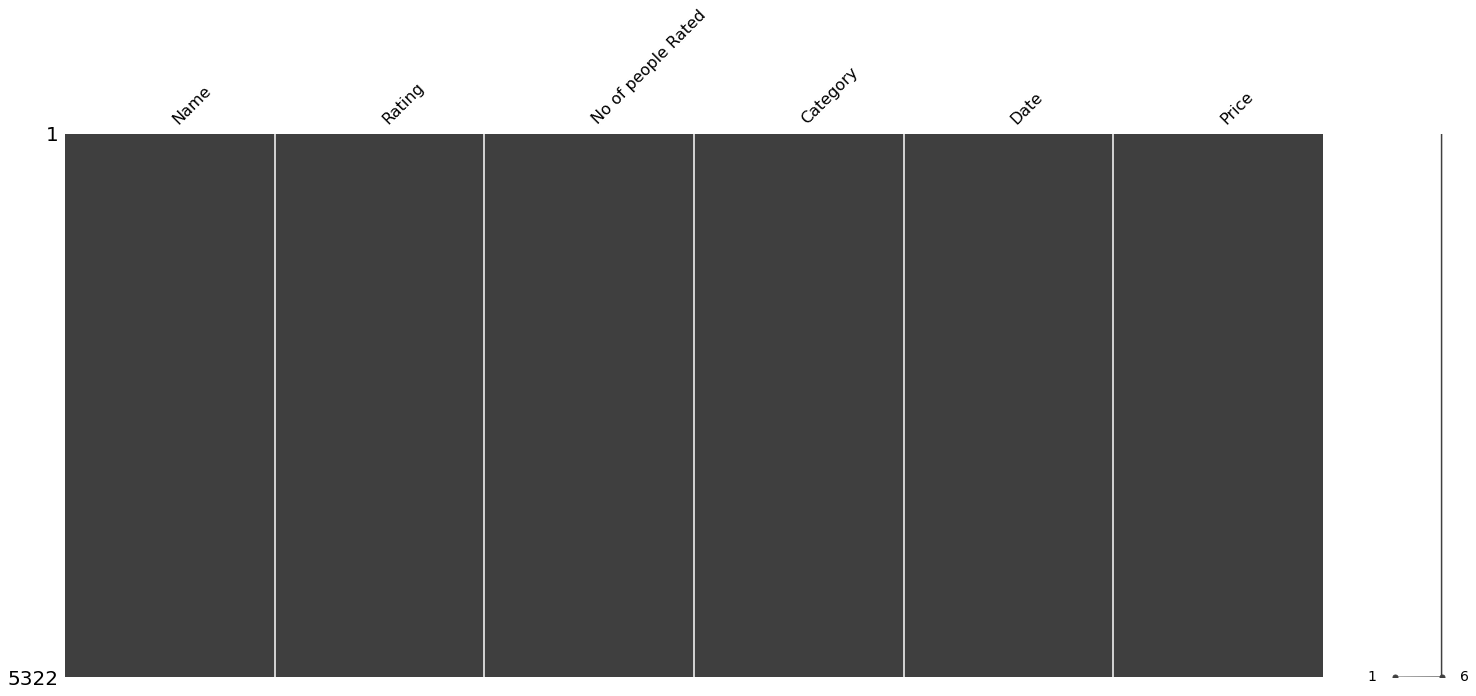

In [30]:
msno.matrix(df_msft)# porque da lo mismo

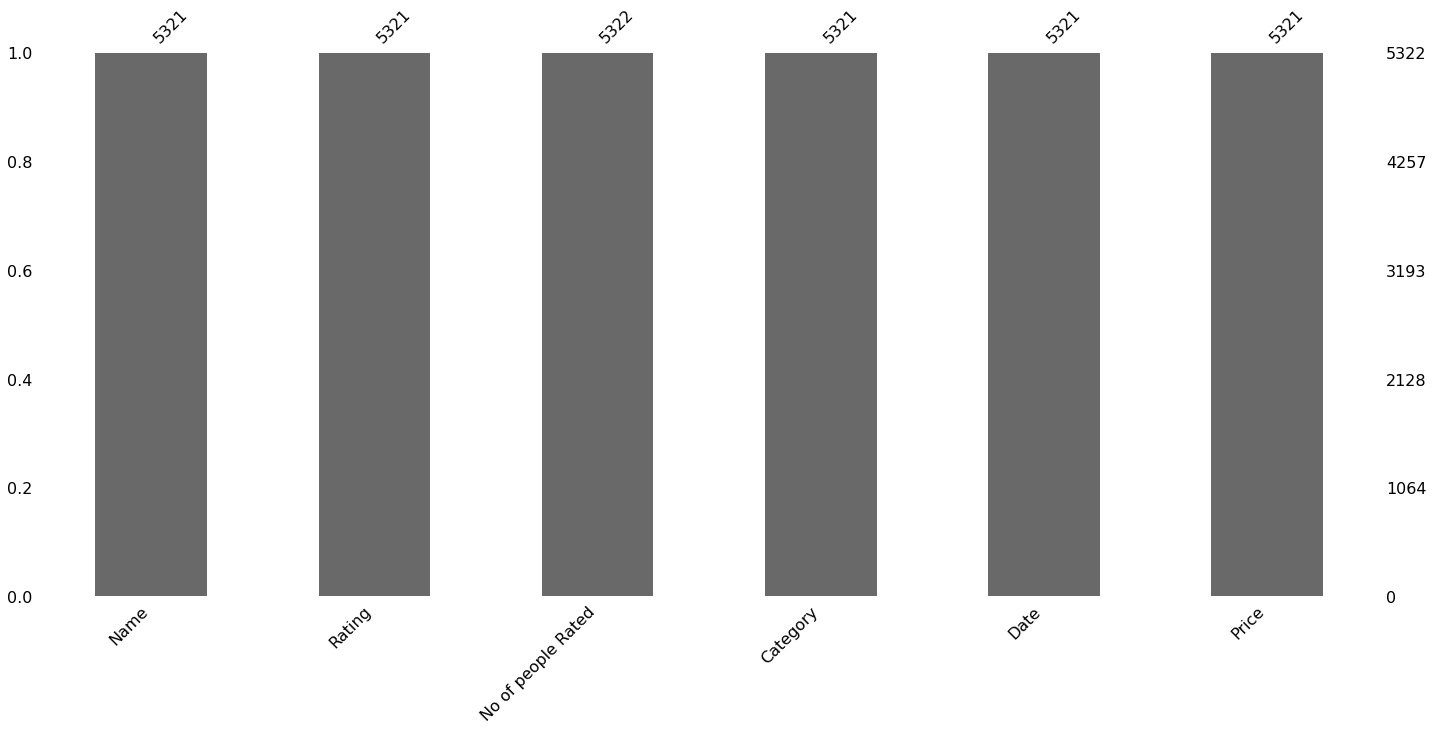

In [31]:
msno.bar(df_msft)

In [32]:
df_msft.columns[df_msft.isnull().any()].tolist() #columnas con valores faltantes

['Name', 'Rating', 'Category', 'Date', 'Price']

In [36]:
df_msft.isnull().sum() 

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64

In [39]:
df_msft.isnull().any().sum()

5

In [40]:
df_msft.describe()

,Rating,No of people Rated
count,5321.000000,5322.000000
mean,3.792708,551.873168
std,0.991681,259.820088
min,1.000000,100.000000
25%,3.500000,327.000000
50%,4.000000,548.000000
75%,4.500000,779.000000
max,5.000000,1000.000000


Diferentes formas de seleccionar filas

In [45]:
df_msft.loc[[53]] #Seleccionar una fila especifica. i (0;n-1)

,Name,Rating,No of people Rated,Category,Date,Price
53,"Bird Calls - Free : 4500+ Bird Sounds, Bird So...",3.5,307,Books,28-08-2014,Free


In [46]:
df_msft.Category.loc[[53]]

53    Books
Name: Category, dtype: object

In [48]:
df_msft["Category"].loc[[53]]

53    Books
Name: Category, dtype: object

In [49]:
df_msft[["Category", "Price"]].loc[[53]]

,Category,Price
53,Books,Free


In [52]:
df_msft.loc[4220:4225]

,Name,Rating,No of people Rated,Category,Date,Price
4220,Jango Player,4.0,759,Music,04-09-2014,Free
4221,Podcast Bandit,3.0,369,Music,16-01-2013,Free
4222,DAAP Media Player,2.0,319,Music,17-09-2013,Free
4223,cPlayerRT,2.5,119,Music,20-12-2013,Free
4224,Most Popular Ringtones for Windows Phone,3.5,863,Music,22-07-2014,Free
4225,Heartbeat Sounds Ringtones,3.5,426,Music,20-08-2014,Free


Excluir filas

In [53]:
df_msft.drop([0,24,51], axis=0).head()

,Name,Rating,No of people Rated,Category,Date,Price
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
5,Gurbani Reader,4.5,399,Books,18-01-2017,Free


In [54]:
df_msft.drop(df_msft.index[1:5], axis=0).head(10)

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
5,Gurbani Reader,4.5,399,Books,18-01-2017,Free
6,NFO Viewer,4.5,566,Books,13-11-2012,Free
7,Text to Speech TTS,3.0,175,Books,17-10-2013,Free
8,ACK Comics,4.0,460,Books,20-12-2012,Free
9,Learn Biology and Human Body Anatomy by GoLear...,3.5,363,Books,25-11-2013,Free
10,Coding Made Easy - SQL,4.0,774,Books,30-01-2018,Free
11,Baani : Nitnem,4.0,533,Books,29-08-2014,Free
12,iMac® 101,4.0,707,Books,28-03-2014,Free
13,Complete C Programs,4.0,687,Books,07-12-2012,Free


In [55]:
df_msft[100:].head()

,Name,Rating,No of people Rated,Category,Date,Price
100,Backwards Compatible Games Guide,4.0,161,Books,13-11-2015,Free
101,Storyboard Animations,2.0,554,Books,02-05-2015,Free
102,Manupatra for Windows,4.0,225,Books,14-05-2015,Free
103,Bookviser Preview,4.0,585,Books,02-12-2016,Free
104,PDFviewer,2.5,709,Books,14-11-2016,Free


In [56]:
df.tail(-100) 

,Name,Rating,No of people Rated,Category,Date,Price
100,Backwards Compatible Games Guide,4.0,161,Books,13-11-2015,Free
101,Storyboard Animations,2.0,554,Books,02-05-2015,Free
102,Manupatra for Windows,4.0,225,Books,14-05-2015,Free
103,Bookviser Preview,4.0,585,Books,02-12-2016,Free
104,PDFviewer,2.5,709,Books,14-11-2016,Free
...,...,...,...,...,...,...
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00


In [57]:
df_msft.Price.values

array(['Free', 'Free', 'Free', ..., '₹ 269.00', '₹ 219.00', nan],
      dtype=object)

In [59]:
df_msft[['Rating', "Name"]].values

array([[3.5, 'Dynamic Reader'],
       [3.0,
        'Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob'],
       [3.5, 'BookViewer'],
       ...,
       [4.0, 'Dev Utils - JSON, CSV and XML'],
       [4.0, 'Simply Text'],
       [nan, nan]], dtype=object)

In [60]:
df_msft.Rating.unique()

array([3.5, 3. , 2. , 4.5, 4. , 1. , 2.5, 5. , 1.5, nan])

In [61]:
df_msft.Rating.nunique()

9

In [62]:
df_msft.Price.unique()

array(['Free', '₹ 144.00', '₹ 54.00', '₹ 99.00', '₹ 219.00', '₹ 269.00',
       '₹ 134.00', '₹ 164.00', '₹ 109.00', '₹ 1,624.00', '₹ 1,099.00',
       '₹ 1,349.00', '₹ 59.00', '₹ 154.00', '₹ 119.00', '₹ 94.00',
       '₹ 69.00', '₹ 139.00', '₹ 189.00', '₹ 549.00', '₹ 79.00',
       '₹ 2,599.00', '₹ 299.00', '₹ 574.00', '₹ 329.40', '₹ 1,521.80',
       '₹ 324.00', '₹ 824.00', '₹ 5,449.00', '₹ 89.50', '₹ 114.00',
       '₹ 194.00', '₹ 319.00', '₹ 624.00', '₹ 2,149.00', '₹ 1,149.00',
       '₹ 434.00', '₹ 279.00', '₹ 209.00', '₹ 699.00', '₹ 1,899.00',
       '₹ 489.00', '₹ 54.50', '₹ 64.00', nan], dtype=object)

In [63]:
df_msft.Price.nunique()

44

In [64]:
df_msft.Name.unique()

array(['Dynamic Reader',
       'Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob',
       'BookViewer', ..., 'Dev Utils - JSON, CSV and XML', 'Simply Text',
       nan], dtype=object)

In [65]:
df_msft.Name.nunique()

5317

In [67]:
df_msft.Rating.value_counts()

4.0    1299
5.0     968
4.5     900
3.5     844
3.0     615
2.5     276
1.0     201
2.0     156
1.5      62
Name: Rating, dtype: int64

In [68]:
df_msft.Price.value_counts()

Free          5163
₹ 269.00        55
₹ 54.00         14
₹ 549.00        10
₹ 109.00         9
₹ 164.00         8
₹ 144.00         5
₹ 219.00         5
₹ 79.00          4
₹ 69.00          4
₹ 1,099.00       4
₹ 99.00          3
₹ 1,624.00       3
₹ 154.00         3
₹ 59.00          2
₹ 324.00         1
₹ 1,899.00       1
₹ 329.40         1
₹ 1,149.00       1
₹ 189.00         1
₹ 279.00         1
₹ 119.00         1
₹ 2,599.00       1
₹ 139.00         1
₹ 64.00          1
₹ 434.00         1
₹ 319.00         1
₹ 699.00         1
₹ 299.00         1
₹ 574.00         1
₹ 1,349.00       1
₹ 89.50          1
₹ 1,521.80       1
₹ 194.00         1
₹ 5,449.00       1
₹ 134.00         1
₹ 94.00          1
₹ 2,149.00       1
₹ 114.00         1
₹ 489.00         1
₹ 624.00         1
₹ 54.50          1
₹ 824.00         1
₹ 209.00         1
Name: Price, dtype: int64

In [69]:
df_msft.Category.value_counts()

Music                      753
Books                      707
Business                   679
Health and Fitness         527
Developer Tools            500
Lifestyle                  492
News and Weather           483
Kids and Family            345
Social                     328
Food and Dining            166
Navigation and Maps        154
Multimedia Design          117
Government and Politics     70
Name: Category, dtype: int64

In [70]:
df_msft.agg(['count', 'size', 'nunique'])#Obtener el numero de valores únicos por columna

,Name,Rating,No of people Rated,Category,Date,Price
count,5321,5321,5322,5321,5321,5321
size,5322,5322,5322,5322,5322,5322
nunique,5317,9,899,13,2124,44


An agg within a groupby. Andstack at the end.

In [71]:
df.groupby("Category").agg(['count', 'size', 'nunique']).stack()

Name  Rating  No of people Rated  Date  Price
Category                                                                      
Books                   count     707     707                 707   707    707
                        size      707     707                 707   707    707
                        nunique   707       9                 497   537     23
Business                count     679     679                 679   679    679
                        size      679     679                 679   679    679
                        nunique   679       9                 484   546     10
Developer Tools         count     500     500                 500   500    500
                        size      500     500                 500   500    500
                        nunique   499       9                 380   435     30
Food and Dining         count     166     166                 166   166    166
                        size      166     166                 166   166    166
                        nunique   166       9                 152   151      1
Government and Politics count      70      70                  70    70     70
                        size       70      70                  70    70     70
                        nunique    70       8                  70    63      1
Health and Fitness      count     527     527                 527   527    527
                        size      527     527                 527   527    527
                        nunique   527       9                 392   430      1
Kids and Family         count     345     345                 345   345    345
                        size      345     345                 345   345    345
                        nunique   345       9                 283   292      1
Lifestyle               count     492     492                 492   492    492
                        size      492     492                 492   492    492
                        nunique   492       9                 384   406      1
Multimedia Design       count     117     117                 117   117    117
                        size      117     117                 117   117    117
                        nunique   117       9                 109   107      1
Music                   count     753     753                 753   753    753
                        size      753     753                 753   753    753
                        nunique   753       9                 512   583      1
Navigation and Maps     count     154     154                 154   154    154
                        size      154     154                 154   154    154
                        nunique   154       9                 142   149      1
News and Weather        count     483     483                 483   483    483
                        size      483     483                 483   483    483
                        nunique   482       9                 381   406      1
Social                  count     328     328                 328   328    328
                        size      328     328                 328   328    328
                        nunique   328       9                 275   301      1

In [72]:
df_msft.groupby("Category").agg(['count', 'size', 'nunique'])

Name              Rating               \
                        count size nunique  count size nunique   
Category                                                         
Books                     707  707     707    707  707       9   
Business                  679  679     679    679  679       9   
Developer Tools           500  500     499    500  500       9   
Food and Dining           166  166     166    166  166       9   
Government and Politics    70   70      70     70   70       8   
Health and Fitness        527  527     527    527  527       9   
Kids and Family           345  345     345    345  345       9   
Lifestyle                 492  492     492    492  492       9   
Multimedia Design         117  117     117    117  117       9   
Music                     753  753     753    753  753       9   
Navigation and Maps       154  154     154    154  154       9   
News and Weather          483  483     482    483  483       9   
Social                    328  328     328    328  328       9   

                        No of people Rated               Date               \
                                     count size nunique count size nunique   
Category                                                                     
Books                                  707  707     497   707  707     537   
Business                               679  679     484   679  679     546   
Developer Tools                        500  500     380   500  500     435   
Food and Dining                        166  166     152   166  166     151   
Government and Politics                 70   70      70    70   70      63   
Health and Fitness                     527  527     392   527  527     430   
Kids and Family                        345  345     283   345  345     292   
Lifestyle                              492  492     384   492  492     406   
Multimedia Design                      117  117     109   117  117     107   
Music                                  753  753     512   753  753     583   
Navigation and Maps                    154  154     142   154  154     149   
News and Weather                       483  483     381   483  483     406   
Social                                 328  328     275   328  328     301   

                        Price               
                        count size nunique  
Category                                    
Books                     707  707      23  
Business                  679  679      10  
Developer Tools           500  500      30  
Food and Dining           166  166       1  
Government and Politics    70   70       1  
Health and Fitness        527  527       1  
Kids and Family           345  345       1  
Lifestyle                 492  492       1  
Multimedia Design         117  117       1  
Music                     753  753       1  
Navigation and Maps       154  154       1  
News and Weather          483  483       1  
Social                    328  328       1

Se hace una muestra

In [73]:
df_sample = df_msft.sample(frac=0.05, random_state=1) #que es random_state?
df_sample.head()

,Name,Rating,No of people Rated,Category,Date,Price
2362,Relax Forest - Nature sounds,4.0,938,Health and Fitness,23-04-2020,Free
2805,E-number: Food Additives,5.0,585,Health and Fitness,15-10-2014,Free
2819,Episode - Romance Club,4.0,338,Kids and Family,08-10-2019,Free
3073,Bratz Paint,4.0,420,Kids and Family,26-12-2014,Free
3729,Shapes Textures Wallpapers,4.0,990,Multimedia Design,30-01-2018,Free


In [74]:
df_msft.shape

(5322, 6)

In [75]:
df_sample.shape

(266, 6)

## Transformación de los datos

Drop Rows with missing count

In [77]:
df_dropped = df_msft.dropna(subset=['Rating'])
df_dropped.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [78]:
df_dropped.shape

(5321, 6)

In [84]:
df=df_dropped

In [85]:
df['Rating'][df['Category'] == "Books"].mean()

3.7913719943422914

In [86]:
df.groupby(["Category"]).count()

,Name,Rating,No of people Rated,Date,Price
Category,,,,,
Books,707,707,707,707,707
Business,679,679,679,679,679
Developer Tools,500,500,500,500,500
Food and Dining,166,166,166,166,166
Government and Politics,70,70,70,70,70
Health and Fitness,527,527,527,527,527
Kids and Family,345,345,345,345,345
Lifestyle,492,492,492,492,492
Multimedia Design,117,117,117,117,117


In [87]:
df.groupby(["Category","Rating"]).count()

Name  No of people Rated  Date  Price
Category Rating                                       
Books    1.0       31                  31    31     31
         1.5       11                  11    11     11
         2.0       27                  27    27     27
         2.5       37                  37    37     37
         3.0       78                  78    78     78
...               ...                 ...   ...    ...
Social   3.0       34                  34    34     34
         3.5       59                  59    59     59
         4.0       87                  87    87     87
         4.5       63                  63    63     63
         5.0       51                  51    51     51

[116 rows x 4 columns]

In [88]:
df.groupby(["Date","Category"]).count()

Name  Rating  No of people Rated  Price
Date       Category                                                   
01-01-2014 Business               1       1                   1      1
01-01-2015 Health and Fitness     1       1                   1      1
           Lifestyle              1       1                   1      1
           Music                  1       1                   1      1
           News and Weather       1       1                   1      1
...                             ...     ...                 ...    ...
31-12-2018 Developer Tools        1       1                   1      1
           Music                  1       1                   1      1
31-12-2019 Business               1       1                   1      1
           Developer Tools        1       1                   1      1
           Health and Fitness     2       2                   2      2

[4406 rows x 4 columns]

In [90]:
df.groupby(["Date","No of people Rated"]).mean()

Rating
Date       No of people Rated        
01-01-2014 263                    4.0
01-01-2015 183                    5.0
           362                    3.0
           493                    3.5
           626                    4.0
...                               ...
31-12-2018 259                    4.5
31-12-2019 354                    3.0
           364                    5.0
           761                    5.0
           833                    4.5

[5311 rows x 1 columns]

## Visualizacion de los datos

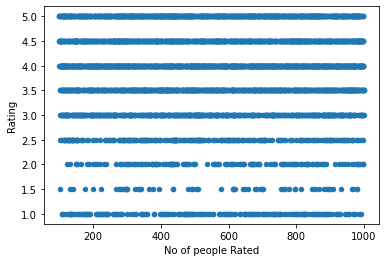

In [105]:
df.plot(kind='scatter',x='No of people Rated',y='Rating')

Text(0.5, 1.0, 'Frequency of No of people Rated')

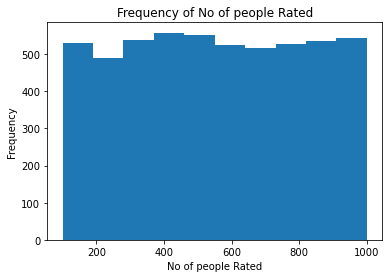

In [98]:
plt.hist(df['No of people Rated'])
plt.xlabel('No of people Rated')
plt.ylabel('Frequency')
plt.title('Frequency of No of people Rated')

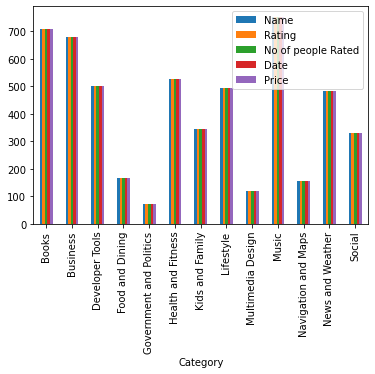

In [110]:
df_c=df.groupby(["Category"]).count()
df_c.plot(kind='bar')